# Genetic Algorithm (Binary)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

In [2]:
class Chromosome:
    def __init__(self, genes) -> None:
        self.genes = genes
        self.cost = None

    def __repr__(self) -> str:
        return f'Node(genes={self.genes}, cost={self.cost})'

    def __lt__(self, other):
        return self.cost < other.cost

## Objective function

In [3]:
def objective(x):
  return np.sum(np.square(x))  # sphere function

## Initialization

In [4]:
def initialization(m, n):
    # m -> no of chromosomes
    # n -> no of genes in chromosome
    pop = [Chromosome(np.random.randint(2, size=n)) for i in range(m)]
    for c in pop:
        c.cost = objective(c.genes)
    return pop

# testing
initialization(2, 3)

[Node(genes=[1 1 1], cost=3), Node(genes=[0 1 0], cost=1)]

## Selection

In [5]:
def selection(pop):
    wts = [chr.cost for chr in pop]
    # print(wts)
    wts = wts - (min(wts)-1) # shifting so min value becomes 1
    wts = wts / sum(wts) # scaling to probability values

    # two indices between [0,len(pop)-1] without replacement
    ixs = np.random.choice(len(pop), 2, p=wts, replace=False) 

    # return pop[ixs[0]], pop[ixs[1]] # these get modified later, so make deep copies
    return copy.deepcopy(pop[ixs[0]]), copy.deepcopy(pop[ixs[1]])

# testing
selection(initialization(5, 5))

(Node(genes=[0 1 1 0 1], cost=3), Node(genes=[1 0 0 1 1], cost=3))

## Crossover

In [6]:
def crossover(parent1, parent2, p_c, type):
    n = len(parent1.genes)
    if type == 'single':
        sp = np.random.randint(1,n)  # [0 1 2 3 4], valid split points are 1,2,3,4
        child1 = Chromosome(np.concatenate((parent1.genes[:sp], parent2.genes[sp:])))
        child2 = Chromosome(np.concatenate((parent2.genes[:sp], parent1.genes[sp:])))

    else:
        sp = np.random.choice(np.arange(1,n), 2, replace=False)
        sp = np.sort(sp)
        print(sp)
        child1 = Chromosome(np.concatenate((parent1.genes[:sp[0]], 
                                            parent2.genes[sp[0]:sp[1]],
                                            parent1.genes[sp[1]:])))
        child2 = Chromosome(np.concatenate((parent2.genes[:sp[0]], 
                                            parent1.genes[sp[0]:sp[1]],
                                            parent2.genes[sp[1]:])))

    p1 = np.random.rand()
    p2 = np.random.rand()
    return (child1 if p1 < p_c else parent1, child2 if p2 < p_c else parent2)
    
# testing
_sel = selection(initialization(5, 5))
print(_sel)
crossover(_sel[0], _sel[1], p_c=1, type='double')

(Node(genes=[0 0 1 1 1], cost=3), Node(genes=[0 1 0 0 1], cost=2))
[2 3]


(Node(genes=[0 0 0 1 1], cost=None), Node(genes=[0 1 1 0 1], cost=None))

## Mutation

In [7]:
def mutation(child, p_m):
    for i in range(len(child.genes)):
        p = np.random.rand()
        child.genes[i] = 1-child.genes[i] if p < p_m else child.genes[i]
    child.cost = objective(child.genes) # because cost need not be correct any more
    return child

# testing
_pop = initialization(1, 5)
print(_pop)
mutation(_pop[0], p_m=0.1)

[Node(genes=[0 1 0 0 1], cost=2)]


Node(genes=[0 1 0 1 1], cost=3)

## Elitism

In [8]:
def elitism(pop, new_pop, e_r):
    m = len(pop)
    ec = int(e_r * m) # elites count
    # print(ec)
    pop.sort(reverse=True)
    new_pop.sort()
    new_pop[:ec] = pop[:ec]
    return new_pop

## Main Genetic Algorithm function

In [9]:
cost_list = []

def genetic_algorithm(m, n, max_gens, p_c, p_m, e_r):
    pop = initialization(m, n)

    for g in range(max_gens):

        new_pop = []

        for i in range(m//2):
            # print(i, pop)
            parent1, parent2 = selection(pop)
            child1, child2 = crossover(parent1, parent2, p_c, 'single')
            child1 = mutation(child1, p_m)
            child2 = mutation(child2, p_m)

            new_pop.append(child1)
            new_pop.append(child2)

        for c in new_pop:
            c.cost = objective(c.genes)

        pop = elitism(pop, new_pop, e_r)
        cost_list.append(max(pop).cost)
    
    plt.plot(cost_list)
    return max(pop)

Node(genes=[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1], cost=49)

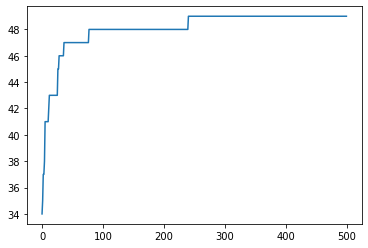

In [10]:
genetic_algorithm(50, 50, 500, 0.95, 0.1, 0.1)